In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("/content/drive/MyDrive/Potential proyect datasets/Life Expectancy Data/Life Expectancy Data.csv")
data = data[data['Country'] != 'Tuvalu']
data = data.interpolate()

Introducción:

El objetivo de mi proyecto es analizar y comprender los factores que influyen en la esperanza de vida en diferentes países, y cómo esta métrica impacta en la salud global y el desarrollo sostenible.

Motivación:

La esperanza de vida es un indicador crucial para evaluar la calidad de vida y el progreso social en una sociedad. Este tema me motiva porque la salud y el bienestar de las personas son aspectos fundamentales en la vida de todos. Entender los factores que afectan la esperanza de vida nos puede proporcionar ideas para nuevas políticas, programas y otras medidas que mejoren la calidad de vida de las personas en diferentes regiones del mundo.

Audiencia:

Mi proyecto está dirigido a:

Profesionales de la Salud y Expertos en Políticas Públicas: Mi análisis podría ayudar a los profesionales de la salud y a los formuladores de políticas a identificar las áreas que requieren una mayor atención en términos de salud pública y planificación estratégica.

Organizaciones No Gubernamentales (ONG): Las ONG pueden utilizar los resultados de mi investigación para enfocar sus esfuerzos en programas y proyectos que mejoren la salud y el bienestar en comunidades vulnerables.


Público General: Mi proyecto también es accesible para cualquier persona interesada en aprender sobre la esperanza de vida y su impacto en la sociedad global.


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2937 non-null   object 
 1   Year                             2937 non-null   int64  
 2   Status                           2937 non-null   object 
 3   Life expectancy                  2937 non-null   float64
 4   Adult Mortality                  2937 non-null   float64
 5   infant deaths                    2937 non-null   int64  
 6   Alcohol                          2937 non-null   float64
 7   percentage expenditure           2937 non-null   float64
 8   Hepatitis B                      2937 non-null   float64
 9   Measles                          2937 non-null   int64  
 10   BMI                             2937 non-null   float64
 11  under-five deaths                2937 non-null   int64  
 12  Polio               

In [ ]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5







 'Alcohol',



# Variables Importantes:

1. Life expectancy: Esperanza de vida en años

2. Country: País

3. Year: Año

4. Status: País desarrollado o en desarrollo

5. percentage expenditure: Gastos en salud como porcentaje del
   Producto Bruto Interno per cápita (%)

6. Income composition of resources: Índice de Desarrollo Humano en términos de
   composición de ingresos de los recursos (índice que va de 0 a 1)

7. Schooling: Número de años de Escolaridad

8. Alcohol: Consumo de Alcohol per cápita registrado (15+) en litros de alcohol puro

9. infant deaths: Número de muertes infantiles por cada 1000 habitantes

10. under-five deaths: Número de muertes de menores de cinco años por cada 1000 habitantes

11. BMI: Índice de masa corporal promedio de toda la población

12. thinness 1-19 years: Prevalencia de delgadez en niños y adolescentes de 10 a 19 años (% )

13.  HIV/AIDS: Muertes por cada 1000 nacidos causadas por VIH/SIDA (de 0 a 4 años)

14. Diphtheria: Cobertura de inmunización por Diphtheria tetanus toxoid y pertussis (DTP3) entre los niños de 1 año (%)

15. Measles: Número de casos de sarampión notificados por cada 1000 habitantes

16. Polio: Cobertura de vacunación contra la polio (Pol3) entre los niños de 1 año (%)

17. Hepatitis B: Cobertura de inmunización contra la hepatitis B (HepB) entre los niños de 1 año (%)



-----------------------------------------------------------------------------------------------------------------o-----------------------------------------------------------------------------------------------------------------

Preguntas:

- ¿Cómo cambió la esperanza de vida general entre 2000 y 2015?
- ¿Cómo afecta el estado de desarrollo de un país a su esperanza de vida?
- ¿Tiene un impacto en la esperanza de vida el nivel de educación?
- ¿Exíste una correlación entre el GDP (PBI) y la esperanza de vida?


Pregunta:

¿Cómo cambió la esperanza de vida general entre 2000 y 2015?




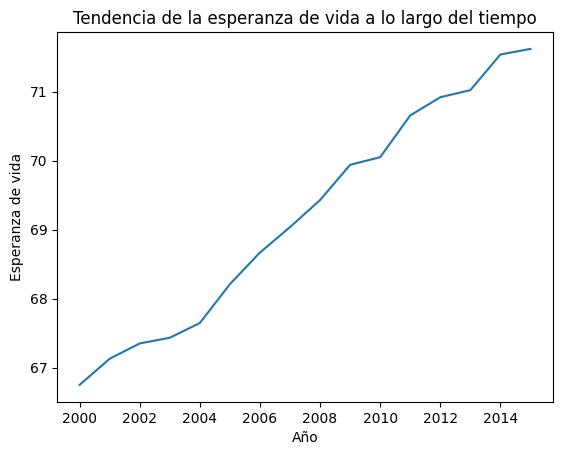

In [ ]:

average_life_by_year = data.groupby("Year")["Life expectancy "].mean().reset_index()

plt.plot(average_life_by_year["Year"], average_life_by_year["Life expectancy "])
plt.xlabel("Año")
plt.ylabel("Esperanza de vida")
plt.title("Tendencia de la esperanza de vida a lo largo del tiempo")
plt.show()


Hipótesis:
La esperanza de vida general aumentó entre 2000 y 2015 debido a los avances en la medicina, mejoras en las condiciones de vida y un aumento de la educación general con respecto a la salud.

-----------------------------------------------------------------------------------------------------------------o-----------------------------------------------------------------------------------------------------------------



Pregunta:

¿Cómo afecta el estado de desarrollo de un país a su esperanza de vida?

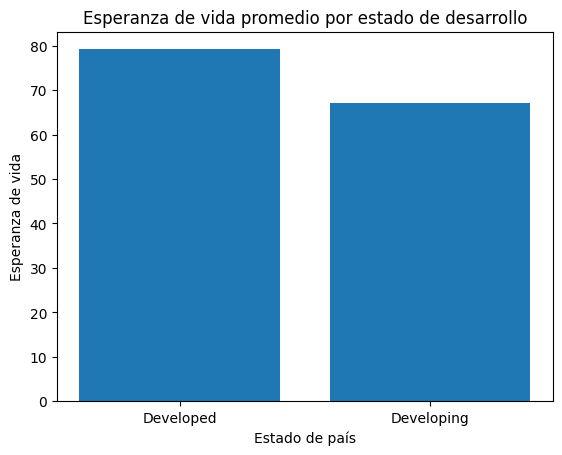

In [ ]:

average_life_by_status = data.groupby("Status")["Life expectancy "].mean().reset_index()

plt.bar(average_life_by_status["Status"], average_life_by_status["Life expectancy "])
plt.xlabel("Estado de país")
plt.ylabel("Esperanza de vida")
plt.title("Esperanza de vida promedio por estado de desarrollo")
plt.show()


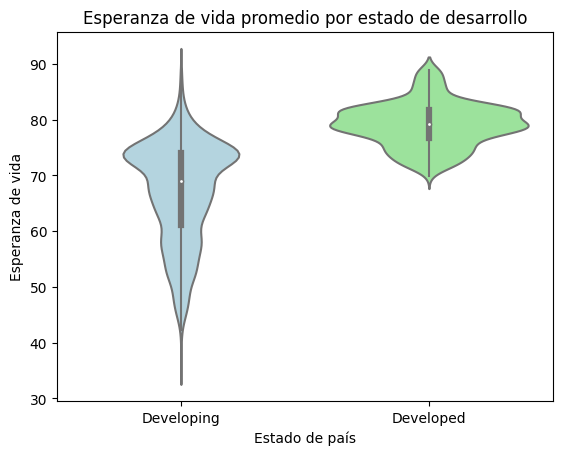

In [ ]:

plt.figure
sns.violinplot(data=data, x='Status', y='Life expectancy ', palette=['lightblue', 'lightgreen'])
plt.xlabel("Estado de país")
plt.ylabel("Esperanza de vida")
plt.title("Esperanza de vida promedio por estado de desarrollo")

plt.show()


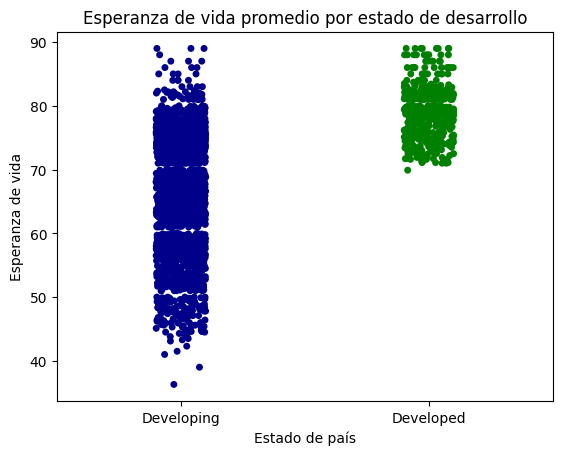

In [ ]:


sns.stripplot(data=data, x='Status', y='Life expectancy ', palette=['darkblue', 'green'])
plt.xlabel("Estado de país")
plt.ylabel("Esperanza de vida")
plt.title("Esperanza de vida promedio por estado de desarrollo")

plt.show()


Hipótesis:
Los países desarrollados generalmente tienen una mayor esperanza de vida en comparación con los países subdesarrollados, ya que suelen tener mejores sistemas de salud, infraestructura y condiciones socioeconómicas.

-----------------------------------------------------------------------------------------------------------------o-----------------------------------------------------------------------------------------------------------------

Pregunta:

¿Tiene un impacto en la esperanza de vida el nivel de educación?

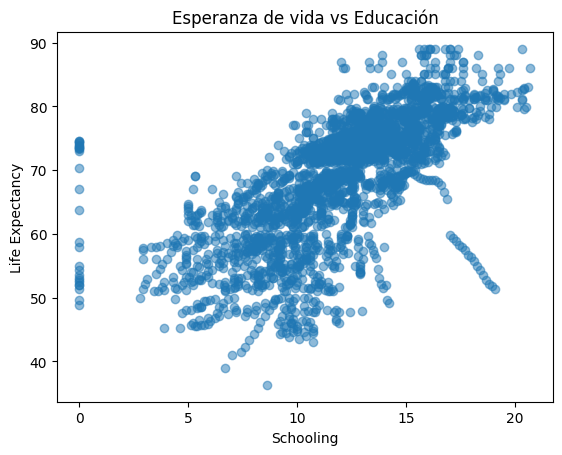

In [ ]:
plt.scatter(data["Schooling"], data["Life expectancy "], alpha=0.5)
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
plt.title("Esperanza de vida vs Educación")
plt.show()


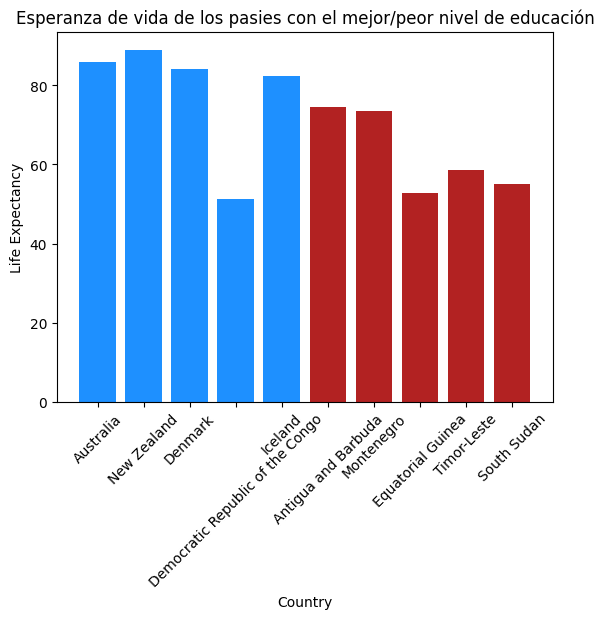

In [ ]:


best_schooling = data.sort_values('Schooling', ascending=False).drop_duplicates('Country').head(5)
worst_schooling = data.sort_values('Schooling').drop_duplicates('Country').head(5)


plt.figure
plt.bar(best_schooling['Country'], best_schooling['Life expectancy '], color='dodgerblue')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Esperanza de vida de los pasies con el mejor/peor nivel de educación')
plt.bar(worst_schooling['Country'], worst_schooling['Life expectancy '], color='firebrick')
plt.xticks(rotation=45)

plt.show()

Hipótesis:

Un nivel más altos de educación influye de forma positiva en la esperanza de vida, ya que la educación a menudo conduce a una mayor conocimiento sobre la salud, formas de vida saludables y un mejor acceso a la atención médica y buenas oportunidades laborales.

-----------------------------------------------------------------------------------------------------------------o-----------------------------------------------------------------------------------------------------------------

Pregunta:
¿Exíste una correlación entre el GDP (PBI) y la esperanza de vida?

[Text(0.5, 1.0, 'Esperanza de vida vs GDP')]

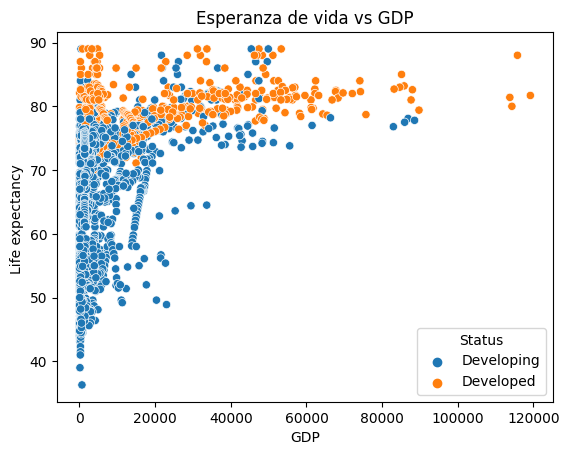

In [ ]:
sns.scatterplot(x="GDP", y="Life expectancy ", hue="Status", data=data).set(title="Esperanza de vida vs GDP")


Hipótesis:

 Hay una correlación positiva entre el GDP (PBI) de un país y la esperanza de vida, ya que un GDP más alto generalmente permite una mejor atención médica, mejores niveles de vida y un mayor acceso a recursos en general.

 El impacto del GDP en la esperanza de vida no es el mismo en los países desarrollados y subdesarrollados debido a las disparidades en los sistemas de salud, los programas sociales, la infraestructura y la educación. El efecto combinado de estos factores influye en la esperanza de vida de cada país.

-----------------------------------------------------------------------------------------------------------------o-----------------------------------------------------------------------------------------------------------------

Algunas recomendaciones de acuerdo a lo observado para mejorar la esperenza de vida serian:

---

- Inversión en los servicios médicos:

 Los países subdesarrollados podrían mejorar la esperanza de vida mediante una mayor inversión en sistemas de salud, infraestructura médica y servicios médicos.


---

- Acceso equitativo a la educación:

  Para mejorar la esperanza de vida es importante garantizar que todos tengan acceso a una educación de calidad. Esto ayudaría a crear una población más informada y consciente de la importancia de la salud y el bienestar.

---

- Fomentar la educación en salud:

  Se podrían implementar programas educativos que fomenten el conocimiento sobre la salud, la higiene y la adopción de estilos de vida saludables.

---

- Desarrollo de programas sociales:

 Implementar programas sociales que brinden asistencia y protección a los grupos más vulnerables, como los ancianos y personas con discapacidades, podria contribuir a mejorar la calidad de vida.

---

- Promover Inversiones en Infraestructura:

  La mejora de la infraestructura en países subdesarrollados, como el acceso a agua potable y saneamiento, puede reducir la propagación de enfermedades y mejorar la salud de la población.

---

- Inversión en Investigación y Desarrollo:
  
  Se debe priorizar la inversión en investigación y desarrollo de tecnologías médicas. Esto incluye la promoción de la inteligencia artificial aplicada a la medicina y el diseño de dispositivos médicos accesibles y eficientes.

---

- Políticas para la Accesibilidad:
  
  Se pueden establecer políticas que promuevan la accesibilidad y disponibilidad de avances tecnológicos en la salud. Por ejemplo la inclusión de incentivos para empresas que produzcan tecnologías a precios asequibles.


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2937 non-null   object 
 1   Year                             2937 non-null   int64  
 2   Status                           2937 non-null   object 
 3   Life expectancy                  2937 non-null   float64
 4   Adult Mortality                  2937 non-null   float64
 5   infant deaths                    2937 non-null   int64  
 6   Alcohol                          2937 non-null   float64
 7   percentage expenditure           2937 non-null   float64
 8   Hepatitis B                      2937 non-null   float64
 9   Measles                          2937 non-null   int64  
 10   BMI                             2937 non-null   float64
 11  under-five deaths                2937 non-null   int64  
 12  Polio               

In [ ]:
data = pd.get_dummies(data, columns=['Status'], drop_first=True)

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2937 non-null   object 
 1   Year                             2937 non-null   int64  
 2   Life expectancy                  2937 non-null   float64
 3   Adult Mortality                  2937 non-null   float64
 4   infant deaths                    2937 non-null   int64  
 5   Alcohol                          2937 non-null   float64
 6   percentage expenditure           2937 non-null   float64
 7   Hepatitis B                      2937 non-null   float64
 8   Measles                          2937 non-null   int64  
 9    BMI                             2937 non-null   float64
 10  under-five deaths                2937 non-null   int64  
 11  Polio                            2937 non-null   float64
 12  Total expenditure   

<font color=Green>En el codigo de arriba tuve que dropear la columna "Country" porque era tipo objeto y no sé como transormarlo sin crear una nueva columna por cada país.
Hay una mejor opción?

<font color=red>CAMBIO SUGERIDO: Podrías asignarle a cada país un número</font>

<font color=Green>Aplicando el cambio sugerido le asigné un valor numérico a cada pais en una nueva columna llamada "Country_ID".

In [ ]:
country_mapping = {country: index + 1 for index, country in enumerate(data["Country"].unique())}

data["Country_ID"] = data["Country"].map(country_mapping)

# Display the mapping of countries to numbers
for country, country_id in country_mapping.items():
    print(f"Country: {country} => Country ID: {country_id}")

Country: Afghanistan => Country ID: 1
Country: Albania => Country ID: 2
Country: Algeria => Country ID: 3
Country: Angola => Country ID: 4
Country: Antigua and Barbuda => Country ID: 5
Country: Argentina => Country ID: 6
Country: Armenia => Country ID: 7
Country: Australia => Country ID: 8
Country: Austria => Country ID: 9
Country: Azerbaijan => Country ID: 10
Country: Bahamas => Country ID: 11
Country: Bahrain => Country ID: 12
Country: Bangladesh => Country ID: 13
Country: Barbados => Country ID: 14
Country: Belarus => Country ID: 15
Country: Belgium => Country ID: 16
Country: Belize => Country ID: 17
Country: Benin => Country ID: 18
Country: Bhutan => Country ID: 19
Country: Bolivia (Plurinational State of) => Country ID: 20
Country: Bosnia and Herzegovina => Country ID: 21
Country: Botswana => Country ID: 22
Country: Brazil => Country ID: 23
Country: Brunei Darussalam => Country ID: 24
Country: Bulgaria => Country ID: 25
Country: Burkina Faso => Country ID: 26
Country: Burundi => C

In [ ]:
data = data.drop("Country", axis=1)

In [ ]:
def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            print(best_features, new_pval.min())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                    print(best_features, p_values.max())

                else:
                    break
        else:
            break
    return best_features,

<font color=red>CAMBIO SUGERIDO: La columna Adult Mortality está altamente correlacionada con la de Life expectancy, e incluirla no parece ayudar a determinar las causas para tener mayor esperanza de vida. Convendría sacarla.</font>

In [ ]:
x = data.drop('Life expectancy ', axis=1)

y = data['Life expectancy ']

In [ ]:
best_features = stepwise_selection(x,y,SL_in=0.05,SL_out = 0.05)

['Income composition of resources'] 0.0
['Income composition of resources', 'Adult Mortality'] 1.575981145806394e-289
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS'] 2.40934340500491e-98
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Schooling'] 3.9391068490283014e-98
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Schooling', 'Diphtheria '] 5.662939230910832e-64
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Schooling', 'Diphtheria ', ' BMI '] 5.8454037689278476e-39
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Schooling', 'Diphtheria ', ' BMI ', 'percentage expenditure'] 8.019808033725357e-23
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Schooling', 'Diphtheria ', ' BMI ', 'percentage expenditure', 'Status_Developing'] 1.6463147587097678e-12
['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Schooling', 'Diphtheria ', ' BMI ', 'percentag

<font color=Green>Siguiendo el consejo de Rosana, saqué "Adult Mortality" de la variable x.

In [ ]:
x = data[{'Income composition of resources',' HIV/AIDS','Schooling','Diphtheria ',' BMI ','percentage expenditure','Status_Developing','Measles ','Polio',' thinness  1-19 years','Hepatitis B',  'Country_ID', 'under-five deaths ','infant deaths','Alcohol'}]
y = data['Life expectancy ']

Training:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'R2 = 0.783, RMSE = 19.254')

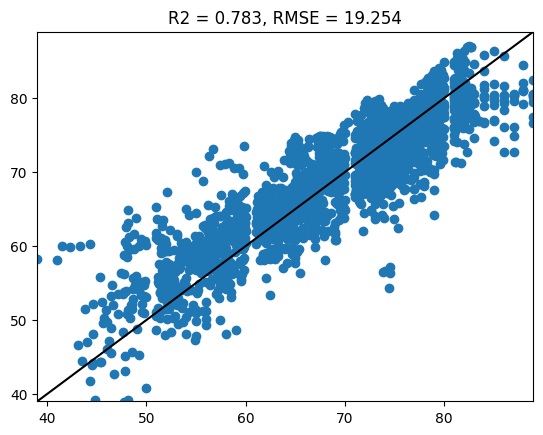

In [ ]:
y_estimated = lr.predict(x_train)
r2=r2_score(y_train,y_estimated)
RMSE=mean_squared_error(y_train, y_estimated)

plt.scatter(y_train, y_estimated)
plt.plot([0,y_train.max()],[0,y_train.max()], color='k')
plt.ylim(y_train.min(),y_train.max())
plt.xlim(y_train.min(),y_train.max())
plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3)))

RMSE = Error cuadrático medio
R2 = Coeficiente de determinación

Testing:


In [ ]:
y_estimated = lr.predict(x_test)
r2=r2_score(y_test,y_estimated)
RMSE=mean_squared_error(y_test, y_estimated)


Text(0.5, 1.0, 'R2 = 0.754, RMSE = 23.848')

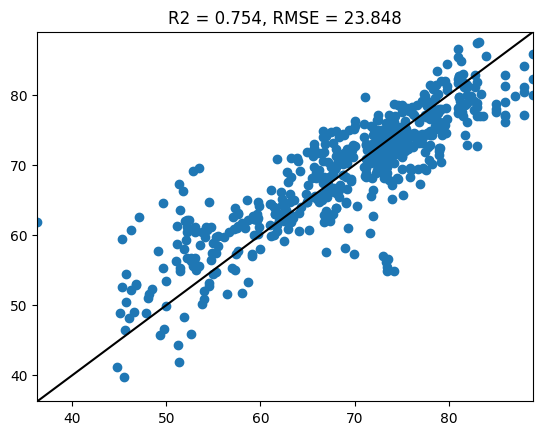

In [ ]:
plt.scatter(y_test, y_estimated)
plt.plot([0,y_test.max()],[0,y_test.max()], color='k')
plt.ylim(y_test.min(),y_test.max())
plt.xlim(y_test.min(),y_test.max())
plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3)))



Un valor R2 de 0,783 en entrenamiento y 0,754 en prueba sugiere que el modelo explica aproximadamente el78 % de la varianza en los datos de entrenamiento y el 75% de la varianza en los datos de prueba.

Los valores de RMSE de 19,254 en entrenamiento y 23,848 en prueba sugieren que, en promedio, las predicciones del modelo se desvían alrededor de 19 años en los datos de entrenamiento y 23 años en los datos de prueba, lo que es un desvio considerable

**Generar una evaluación de modelos apropiados para el problema de interés
Identificar por medio de las métricas:**

Utilizé un modelo de regresión linear porque es el unico que podía utilizar.

No estoy seguro si lo entendí bien, pero creo que no se puede utilizar la Clasificación po árbol de decisión para predicción de la esperanza de vida, un valor numérico float. Me salta el siguiente error: "ValueError: Unknown label type: 'continuous'"

**Identificar por medio de las métricas generadas si se puede tener una situación de overfitting (sobreajuste) o underfitting (subajuste), discutiendo posibles formas de mejora:**


Hay una caída chica en R2 y un aumento en RMSE en el pase del entrenamiento ha la prueba. Esto podría significar que hay un poco de de overfitting ,que el modelo funciona un poco peor en con datos nuevos. Para mejorar esto se podria ajustar el modelo, pero no estoy muy seguro como. Si tuviera mas datos se podrián agregar al dataset para ver de mejorarlo pero no los tengo.